<a href="https://colab.research.google.com/github/dina-masry/Credit-Card-Customer-Segmentation/blob/main/KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

##Load Data

In [ ]:
path= '/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Data/cust_seg.csv'
df= pd.read_csv(path)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df= df.drop(columns= ['Unnamed: 0','Customer Id'])

In [ ]:
# check null values
df.isnull().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [ ]:
df['Defaulted'] = df['Defaulted'].fillna(df['Defaulted'].mode()[0])

In [ ]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

##KMeans

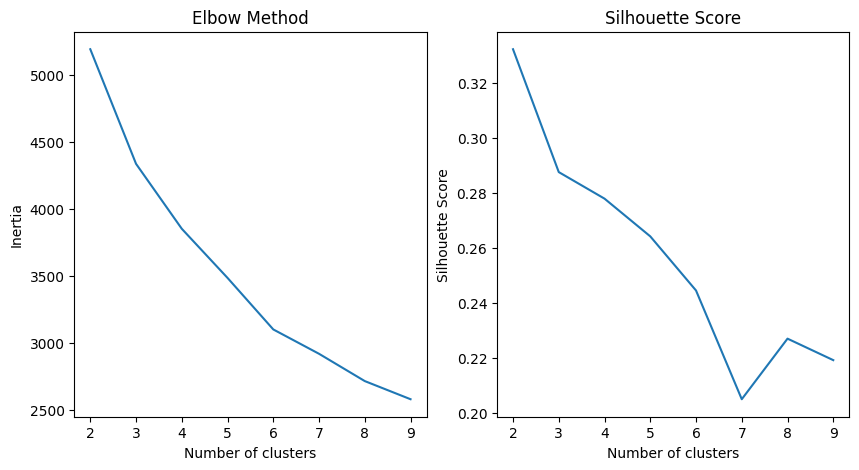

In [ ]:
#Elbow method and silhouette score to choose the best k
inertia =[]
silhouette =[]
for i in range(2,10):
  kmeans= KMeans(n_clusters= i, n_init='auto', random_state= 42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)
  silhouette.append(silhouette_score(df_scaled, kmeans.labels_))
fig , axes = plt.subplots(1,2, figsize= (10,5))
axes[0].plot(range(2,10), inertia)
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[1].plot(range(2,10), silhouette)
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
plt.show()


- 4 or 5 clusters will be the best. I will create 4 clusters.

In [ ]:
kmeans= KMeans(n_clusters= 4, n_init='auto', random_state= 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,3


##Analyzing clusters

In [ ]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.111570,1.609504,6.731405,33.512397,0.775273,1.665585,0.000000,7.812190
1,1,31.682927,1.847561,3.859756,31.432927,1.569311,2.823598,0.987805,14.029268
2,2,42.047872,1.835106,16.345745,81.462766,2.890261,5.959500,0.069149,12.385638
3,3,46.285714,1.928571,22.642857,213.142857,11.737786,16.239857,0.571429,16.821429


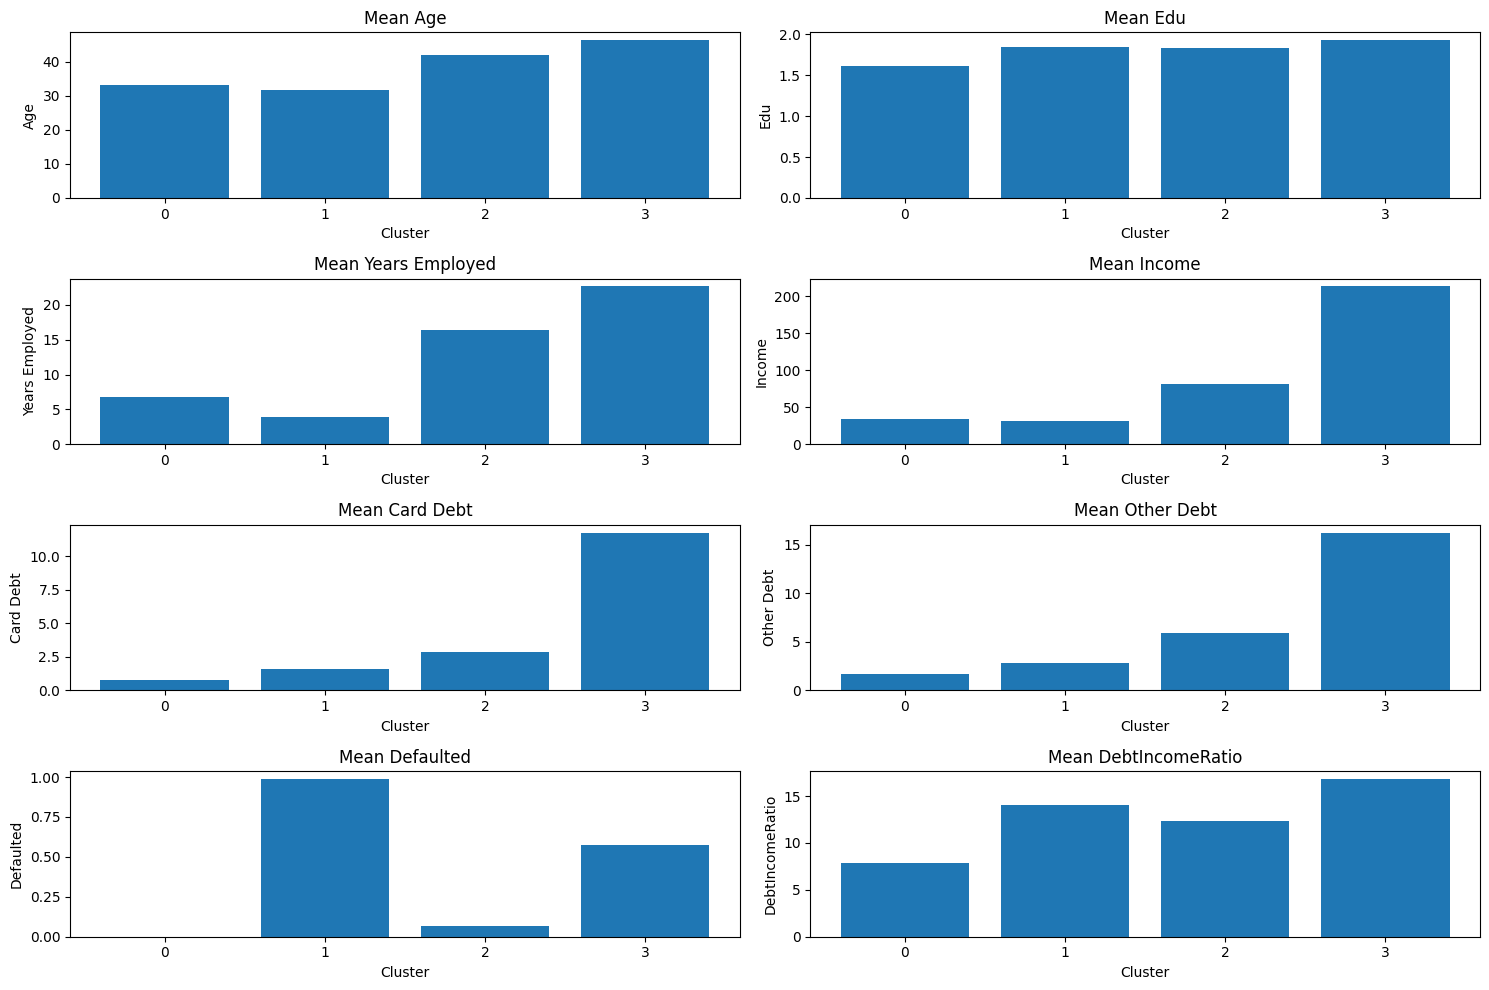

In [ ]:
# Visualize means
fig, axes = plt.subplots(4,2, figsize = (15, 10))
axes = axes.ravel()
x_ticks =[0,1,2,3]
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_xticks(x_ticks)
  axes[i].set_xlabel('Cluster')
  axes[i].set_ylabel(col)
  axes[i].set_title(f'Mean {col}')
fig.tight_layout()

- Cluster 0:
  - Customers who belong to cluster 0 have average of age about 32 years old.
  -Their average education about 1.5 means a half of them educated and the other half not.
  - Their average of years employed about 6 years.
  -Their average income less than 50,000 dollars (the lowest).
  - Their average of card debt about 1000 (the lowest).
  - Their average of other debt about 1000 (the lowest).
  - Their average of defaulted is zero.
  -Their average of debt income ratio is 7000 (the lowest).

- Cluster 1:
  - Customers who belong to cluster 1 have average of age about 30 years old.
  -Their average education about 1.75 means most of them highly educated.
  - Their average of years employed about 4 years (the lowest).
  -Their average income less than 50,000 dollars (the lowest).
  - Their average of card debt about 1500 .
  - Their average of other debt about 2000.
  - Their average of defaulted is 1 ( All of them defaulted).
  -Their average of debt income ratio is 13000.

- Cluster 2:
  - Customers who belong to cluster 2 have average of age about 45 years old.
  -Their average education about 1.5 means a half of them educated and the other half not.
  - Their average of years employed about 17 years.
  -Their average income less than 100,000 dollars.
  - Their average of card debt about 2500 .
  - Their average of other debt about 7000.
  - Their average of defaulted is 0.1 ( Most of them is not defaulted).
  -Their average of debt income ratio is about 12,000.

- Cluster 3:
  - Customers who belong to cluster 3 have average of age about 50 years old.
  -Their average education about 1.9 (the highest).
  - Their average of years employed over than 20 years (the highest).
  -Their average income about 200,000 dollar (the highest).
  - Their average of card debt over than 13,000 (the highest).
  - Their average of other debt over than 15,000(the highest).
  - Their average of defaulted is about 0.5 ( half of them is not defaulted).
  -Their average of debt income ratio is over than 15,000(the highest).

## Recommendation:
   - encourage young people who their ages around 30 and most of them highly eduacted , has been employed for 5 years to get card debet as they tend to other debts and they are usually not defaulted.
   - encourage old people who their ages around 50 , having stable work and high income to continue using card debt more than other debts.